<a href="https://colab.research.google.com/github/EmmanuelRamos143/AA/blob/main/AA_Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np

hearth_df = pd.read_csv("/heart.csv")
##Verify DF is loaded correctly
display(Markdown(hearth_df.head().to_markdown()))


|    |   age |   sex |   cp |   trtbps |   chol |   fbs |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall |   output |
|---:|------:|------:|-----:|---------:|-------:|------:|----------:|-----------:|-------:|----------:|------:|------:|--------:|---------:|
|  0 |    63 |     1 |    3 |      145 |    233 |     1 |         0 |        150 |      0 |       2.3 |     0 |     0 |       1 |        1 |
|  1 |    37 |     1 |    2 |      130 |    250 |     0 |         1 |        187 |      0 |       3.5 |     0 |     0 |       2 |        1 |
|  2 |    41 |     0 |    1 |      130 |    204 |     0 |         0 |        172 |      0 |       1.4 |     2 |     0 |       2 |        1 |
|  3 |    56 |     1 |    1 |      120 |    236 |     0 |         1 |        178 |      0 |       0.8 |     2 |     0 |       2 |        1 |
|  4 |    57 |     0 |    0 |      120 |    354 |     0 |         1 |        163 |      1 |       0.6 |     2 |     0 |       2 |        1 |

In [8]:
hearth_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Actualizacion de dos tipos de datos, los cuales se reviso previamente contenian 0 y 1 , se convertiran a tipo **_boolean_**

In [9]:
hearth_df_cp = hearth_df.copy()
#Convert the columns which are boolean
hearth_df['fbs'] = hearth_df['fbs'].astype('bool')
hearth_df['output'] = hearth_df['output'].astype('bool')
#Verify Data type, Note as there is no char type all other columns remain as is
hearth_df.dtypes






age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs            bool
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output         bool
dtype: object

# Filtro de registros para su exploracion

Los registros con CP (Chest Pain) estan categorizados de la siguiente manera.

0.   Typical Angina
1.   Atypical Angina
2.   Non-anginal Pain
3.   Asymptomatic









In [10]:
# Verificamos el total de personas las por el tipo de dolor en pecho


## Primer paso agregar una columna con el significado de el tipo de dolor de pecho 
## Nota: Esto es solo para el analisis de el tipo de dolor
conditions_chest_pain = [
    (hearth_df['cp'] == 0),
    (hearth_df['cp'] == 1),
    (hearth_df['cp'] == 2) ,
    (hearth_df['cp'] == 3)
    ]

# Creamos una lista de la misma longitud de condiciones que se van a evaluar
values_chest_pain_types = ['Typical angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']

# Creamos nueva columna con basado en las condiciones previas
hearth_df['chest_pain_types'] = np.select(conditions_chest_pain, values_chest_pain_types)


df_hearth_group = hearth_df.groupby('chest_pain_types')['cp'].count()

print(df_hearth_group.tail())

### Creamos filtro individual y revisamos el valor count 
print("\n ")
print("Filtro individual por item para solo con dolor de angina de pecho tipica")
count_hearth_cp_typical_angina =hearth_df.filter(items=['cp'])[hearth_df['cp'] == 0].count()

print(count_hearth_cp_typical_angina.iloc[0])

chest_pain_types
Asymptomatic         23
Atypical Angina      50
Non-anginal Pain     87
Typical angina      143
Name: cp, dtype: int64

 
Filtro individual por item
143


In [11]:
#Filtro de registros con niveles de Azucar mayores a 100, Angina Atipica y cholesterol mayor a 200


hearth_df.rename(columns = {'fbs':'fasting_blood_sugar'}, inplace = True)

display(Markdown(hearth_df.head().to_markdown()))


|    |   age |   sex |   cp |   trtbps |   chol | fasting_blood_sugar   |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall | output   | chest_pain_types   |
|---:|------:|------:|-----:|---------:|-------:|:----------------------|----------:|-----------:|-------:|----------:|------:|------:|--------:|:---------|:-------------------|
|  0 |    63 |     1 |    3 |      145 |    233 | True                  |         0 |        150 |      0 |       2.3 |     0 |     0 |       1 | True     | Asymptomatic       |
|  1 |    37 |     1 |    2 |      130 |    250 | False                 |         1 |        187 |      0 |       3.5 |     0 |     0 |       2 | True     | Non-anginal Pain   |
|  2 |    41 |     0 |    1 |      130 |    204 | False                 |         0 |        172 |      0 |       1.4 |     2 |     0 |       2 | True     | Atypical Angina    |
|  3 |    56 |     1 |    1 |      120 |    236 | False                 |         1 |        178 |      0 |       0.8 |     2 |     0 |       2 | True     | Atypical Angina    |
|  4 |    57 |     0 |    0 |      120 |    354 | False                 |         1 |        163 |      1 |       0.6 |     2 |     0 |       2 | True     | Typical angina     |

In [19]:
## Los valores asignados son para personar con signos de prediabetes
## Angina Atipica y colesteros mayor a su maximo normal para personas mayores a 25 de edad 
#Primero se renombra la columna fbs a fasting_blood_sugar para un nombre mas adecuado

## Aplicando filtro:

hearth_df_gt_25 = hearth_df[(hearth_df['chol'] > 200) & (hearth_df['fasting_blood_sugar'] == True ) & (hearth_df['cp'] == 0)]
print(hearth_df_gt_25.nunique(axis=1).count())

display(Markdown(hearth_df_gt_25.head(18).to_markdown()))



16


|     |   age |   sex |   cp |   trtbps |   chol | fasting_blood_sugar   |   restecg |   thalachh |   exng |   oldpeak |   slp |   caa |   thall | output   | chest_pain_types   |
|----:|------:|------:|-----:|---------:|-------:|:----------------------|----------:|-----------:|-------:|----------:|------:|------:|--------:|:---------|:-------------------|
|  97 |    52 |     1 |    0 |      108 |    233 | True                  |         1 |        147 |      0 |       0.1 |     2 |     3 |       3 | True     | Typical angina     |
| 169 |    53 |     1 |    0 |      140 |    203 | True                  |         0 |        155 |      1 |       3.1 |     0 |     0 |       3 | False    | Typical angina     |
| 176 |    60 |     1 |    0 |      117 |    230 | True                  |         1 |        160 |      1 |       1.4 |     2 |     2 |       3 | False    | Typical angina     |
| 197 |    67 |     1 |    0 |      125 |    254 | True                  |         1 |        163 |      0 |       0.2 |     1 |     2 |       3 | False    | Typical angina     |
| 214 |    56 |     1 |    0 |      125 |    249 | True                  |         0 |        144 |      1 |       1.2 |     1 |     1 |       2 | False    | Typical angina     |
| 215 |    43 |     0 |    0 |      132 |    341 | True                  |         0 |        136 |      1 |       3   |     1 |     0 |       3 | False    | Typical angina     |
| 217 |    63 |     1 |    0 |      130 |    330 | True                  |         0 |        132 |      1 |       1.8 |     2 |     3 |       3 | False    | Typical angina     |
| 219 |    48 |     1 |    0 |      130 |    256 | True                  |         0 |        150 |      1 |       0   |     2 |     2 |       3 | False    | Typical angina     |
| 223 |    56 |     0 |    0 |      200 |    288 | True                  |         0 |        133 |      1 |       4   |     0 |     2 |       3 | False    | Typical angina     |
| 231 |    57 |     1 |    0 |      165 |    289 | True                  |         0 |        124 |      0 |       1   |     1 |     3 |       3 | False    | Typical angina     |
| 251 |    43 |     1 |    0 |      132 |    247 | True                  |         0 |        143 |      1 |       0.1 |     1 |     4 |       3 | False    | Typical angina     |
| 252 |    62 |     0 |    0 |      138 |    294 | True                  |         1 |        106 |      0 |       1.9 |     1 |     3 |       2 | False    | Typical angina     |
| 260 |    66 |     0 |    0 |      178 |    228 | True                  |         1 |        165 |      1 |       1   |     1 |     2 |       3 | False    | Typical angina     |
| 269 |    56 |     1 |    0 |      130 |    283 | True                  |         0 |        103 |      1 |       1.6 |     0 |     0 |       3 | False    | Typical angina     |
| 281 |    52 |     1 |    0 |      128 |    204 | True                  |         1 |        156 |      1 |       1   |     1 |     0 |       0 | False    | Typical angina     |
| 292 |    58 |     0 |    0 |      170 |    225 | True                  |         0 |        146 |      1 |       2.8 |     1 |     2 |       1 | False    | Typical angina     |

Dados los registros mostrados previamente se muestra que no existen personas con una **edad menor a 25** con lo cual no se requiere realizar otro subconjunto para este grupo mas joven de edad.
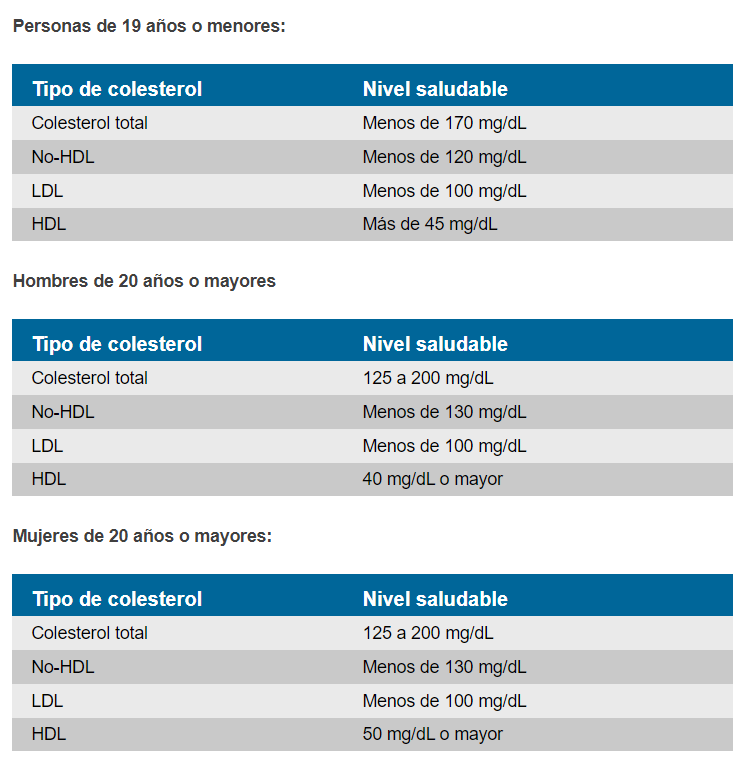

*Anexo tabla de valores permitidos para el colesterol*


### Revision por grupo Genero y Maximo latido de corazon registrado

 Los maximos latidos de corazon se pueden calcular para una actividad fisica moderada y por edad de esta manera.

 220 bpm <- **El limite maximo**

Para una persona de 50 años de edad.
 
 La formula para obtener los intervalos seria:

 220bpm - 50 = 170bpm

170 * 0.64 = 109bpm
170 * 0.76 = 129bpm

Estos valores serian el intervalo de latidos para un ejercisio moderado.

Se procedera a realizar los subconjuntos.


In [25]:
## Personas de maximo 45 años de edad por genero

max_bpm_45_years = ((220 - 45)* 0.64, (220-45)* 0.76) 
## Subgrupo Mujeres menores a 45 de edad, en los intervalo de maximos latidos de corazon 
hearth_df_woman_gt_45 = hearth_df[(hearth_df['thalachh'] > max_bpm_45_years[0]) & 
                                  (hearth_df['thalachh'] <   max_bpm_45_years[1]) & 
                                  (hearth_df['sex'] == 0) &
                                  (hearth_df['age'] < 45)]


## Subgrupo Hombres menores a 45 de edad, en los intervalo de maximos latidos de corazon 
hearth_df_men_gt_45 = hearth_df[(hearth_df['thalachh'] > max_bpm_45_years[0]) & 
                                (hearth_df['thalachh'] <   max_bpm_45_years[1]) & 
                                (hearth_df['sex'] == 1) & 
                                (hearth_df['age'] < 45)]


## Personas de entre 46 a 60 años de edad por genero
max_bpm_60_years = ((220 - 60)* 0.64, (220-60)* 0.76)

# Subgrupo Mujeres de entre 46 a 60 , en los intervalos de maximos latidos de corazon
hearth_df_woman_gt_60 = hearth_df[(hearth_df['thalachh'] > max_bpm_60_years[0]) & 
                                (hearth_df['thalachh'] <   max_bpm_60_years[1]) & 
                                (hearth_df['sex'] == 0) & 
                                ((hearth_df['age'] > 46) & (hearth_df['age'] < 60)) ]

## Subgrupo Hombres menores a 45 de edad, en los intervalo de maximos latidos de corazon                                 
hearth_df_men_gt_60 = hearth_df[(hearth_df['thalachh'] > max_bpm_60_years[0]) & 
                                (hearth_df['thalachh'] <   max_bpm_60_years[1]) & 
                                (hearth_df['sex'] == 1) & 
                                ((hearth_df['age'] > 46) & (hearth_df['age'] < 60)) ]


## Personas de entre 61 a mas años de edad por genero
max_bpm_gt_61_years = ((220 - max(hearth_df['age']))* 0.64, (220-max(hearth_df['age']))* 0.76)   


# Subgrupo Mujeres de 61 anos a mas años , en los intervalos de maximos latidos de corazon
hearth_df_woman_gt_60 = hearth_df[(hearth_df['thalachh'] > max_bpm_gt_61_years[0]) & 
                                (hearth_df['thalachh'] <   max_bpm_gt_61_years[1]) & 
                                (hearth_df['sex'] == 0) & 
                                (hearth_df['age'] > 61) ]

## Subgrupo Hombres mayores a 61 años de edad, en los intervalo de maximos latidos de corazon  
hearth_df_men_gt_60 = hearth_df[(hearth_df['thalachh'] > max_bpm_gt_61_years[0]) & 
                                (hearth_df['thalachh'] <   max_bpm_gt_61_years[1]) & 
                                (hearth_df['sex'] == 1) & 
                                (hearth_df['age'] > 61) ]   

